# "Look at your data!"

\- Chris Re

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
import matplotlib.cm as cmx
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

from Notebook_helpers import load_data
from Notebook_helpers.modeling_helpers import *

%matplotlib inline

## Read in the data

In [3]:
df, train, test = load_data.load_coral_data(complete=True, CV=True, convert_to_categorical=True)

In [4]:
# get summary statistics
df.describe()

,Long,Lat,Coral,CCA,Turf,Macro,Other,Grazers,Scrapers,Browsers,...,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,...,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,-156.973185,20.728832,17.370766,6.111688,58.813531,7.276603,8.467413,15.814621,10.134796,9.896306,...,27.196995,0.919022,0.102248,0.090316,52.406900,9.001442,20.822663,0.115180,10.690679,9.546872
std,1.199391,0.813619,17.109478,6.080902,20.105815,9.787721,10.964297,25.898379,17.675988,35.895237,...,0.409368,0.065704,0.035152,0.052660,4.278262,0.814026,22.295760,0.066225,6.572382,6.090539
min,-160.250286,18.965413,0.000000,0.000000,12.313535,0.000000,0.000000,0.000000,0.000000,0.000000,...,26.170000,0.801192,0.056300,0.002000,36.231602,6.824600,0.886858,0.041487,-1.309367,0.487680
25%,-157.801203,19.856367,3.137780,1.600000,43.247987,0.067343,1.000000,2.425361,0.047486,0.060619,...,26.878000,0.875097,0.083300,0.051400,52.215550,8.343100,6.154151,0.057143,5.542395,4.600000
50%,-156.808687,20.907583,10.805405,4.389021,58.537204,3.491075,4.247239,7.624393,4.293422,1.625744,...,27.374000,0.915251,0.091600,0.088900,54.064400,9.263800,11.545006,0.091254,9.767888,8.794600
75%,-155.982067,21.269171,29.374330,8.800000,75.215385,10.860417,11.179449,17.728449,11.642033,6.013986,...,27.469000,0.946601,0.115400,0.134900,54.796200,9.515100,31.146552,0.166070,13.947940,13.000000
max,-154.820645,22.235486,73.287671,39.687500,98.600000,60.000000,64.000000,268.077556,127.187391,661.217701,...,28.291000,1.157028,0.409100,0.235178,56.416500,11.714200,114.938387,0.503056,35.868209,30.000000


In [5]:
# take a look at the first 14 columns that weren't used in their boosted regression trees
df.iloc[0:5, 0:14]

,id_spatial,Long,Lat,Island,Coral,CCA,Turf,Macro,Other,Grazers,Scrapers,Browsers,Predators,Secondary
0,4,-157.307727,21.106717,Molokai,1.023891,1.706485,77.815700,18.088737,1.023891,1.324986,0.153250,0.163843,0.000000,3.393998
1,5,-157.304986,21.113497,Molokai,3.555556,1.333333,83.555556,9.777778,0.888889,0.890407,0.000000,0.248076,0.000000,2.872683
2,6,-157.303306,21.124814,Molokai,17.620555,6.348836,44.875760,25.716525,4.836712,4.628477,0.143309,5.420154,1.347466,2.238995
3,8,-157.299938,21.148297,Molokai,0.675676,1.351351,86.486487,0.337838,5.743243,0.069128,0.000000,0.000000,0.000000,3.341160
4,9,-157.300286,21.128897,Molokai,4.000000,3.111111,53.333333,17.333333,21.777778,11.775000,0.000000,1.655366,0.967914,8.411082


In [6]:
# other columns that weren't used in their boosted regression trees
df.iloc[0:5, 34:]

,Regime,Regime1,Regime2,Regime3,Regime5
0,1,1,0,0,0
1,1,1,0,0,0
2,2,0,1,0,0
3,1,1,0,0,0
4,2,0,1,0,0


In [7]:
# column s that were used in the boosted trees
df.iloc[0:10, 14:34]

,Effluent,Sedimentation,New_Development,Habitat_Modification,Invasive_Algae,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
0,0.000000,0.075594,0.004250,0,0,0.013817,0.396614,5.622424,3.671531,0.373111,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,4.889608,2.8000
1,0.000000,0.261318,0.004023,0,0,0.013817,0.386873,0.000000,0.000000,0.364839,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,3.793523,7.3152
2,0.000000,0.381684,0.003573,0,0,0.013817,0.377407,0.000000,0.000000,0.309139,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,38.007866,0.084089,5.275938,11.5000
3,0.000000,0.135392,0.000406,0,0,0.013817,0.353853,0.000000,0.000000,0.059943,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,39.139775,0.087039,2.511288,29.1000
4,0.000000,0.577138,0.003794,0,0,0.013817,0.369782,0.000000,0.000000,0.342674,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,40.587803,0.084932,6.865359,10.0584
5,0.000000,0.003530,0.002394,0,0,0.013817,0.408517,0.000000,0.000000,0.221847,27.394,0.945199,0.1213,0.0237,52.643398,8.5628,16.757051,0.086828,6.381398,10.9728
6,438.560303,3.367408,0.003930,0,0,0.013817,0.350479,5.997168,0.000000,0.358001,27.543,0.942912,0.1154,0.0593,53.954201,9.4296,36.345566,0.084510,3.527317,7.3152
7,551.737183,2.297769,0.003794,0,0,0.013817,0.346093,0.000000,0.000000,0.313618,27.543,0.942912,0.1154,0.0593,53.954201,9.4296,36.345566,0.084510,9.274513,12.1000
8,551.737183,3.284121,0.004540,0,0,0.013817,0.346445,8.995751,3.671531,0.371797,27.543,0.942912,0.1154,0.0593,53.954201,9.4296,36.345566,0.084510,12.030105,3.2000
9,1839.123901,0.016422,0.006957,0,0,0.013817,0.321989,0.000000,0.000000,0.315298,27.075,0.975189,0.1154,0.0593,53.954201,9.4296,37.142315,0.083246,4.736316,15.2000


## Data Prep

In [8]:
#Comment out data prep if running VIF
# def data_prep(df):
#     df = df.astype({"id_spatial": "category", "Island": "category", "Habitat_Modification": "category", 
#                "Invasive_Algae": "category", "Regime": "category", "Regime1": "category", 
#                "Regime2": "category", "Regime3": "category", "Regime5": "category"})
#     return df

In [9]:
# df = data_prep(df)
# train = data_prep(train)
# test = data_prep(test)

In [10]:
# print(train.shape)
# print(test.shape)

## Explore the data set

In [11]:
# look at how many NAs exist in the data set
df_nas = df.apply(lambda x : x.isna().sum())

# verify that there are no NAs in the data set anymore
df_nas[df_nas > 0]

Series([], dtype: int64)

### Look at the distribution of the labels between the train & test groups

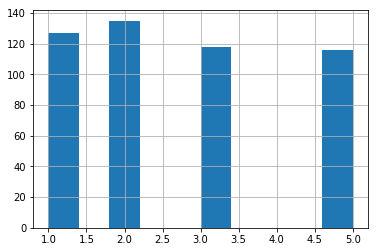

In [12]:
# look at the distribution of regimes
train['Regime'].hist()

In [13]:
train.groupby(['Regime']).size().reset_index(name='Counts')

,Regime,Counts
0,1,127
1,2,135
2,3,118
3,5,116


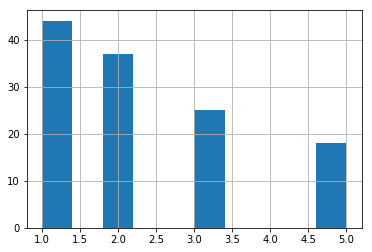

In [14]:
# look at the distribution of regimes
test['Regime'].hist()

In [15]:
test.groupby(['Regime']).size().reset_index(name='Counts')

,Regime,Counts
0,1,44
1,2,37
2,3,25
3,5,18


### Look at correlations between the features

In [16]:
df.iloc[:, 14:34].describe()

,Effluent,Sedimentation,New_Development,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,3827.363948,6.905912,0.025509,0.229942,0.526341,6.365645,0.948522,2.370396,27.196995,0.919022,0.102248,0.090316,52.406900,9.001442,20.822663,0.115180,10.690679,9.546872
std,8556.137170,18.743726,0.040390,0.435801,0.747922,9.469403,1.465142,2.601515,0.409368,0.065704,0.035152,0.052660,4.278262,0.814026,22.295760,0.066225,6.572382,6.090539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.170000,0.801192,0.056300,0.002000,36.231602,6.824600,0.886858,0.041487,-1.309367,0.487680
25%,0.000000,0.000000,0.001873,0.013817,0.121030,0.000000,0.000000,0.144102,26.878000,0.875097,0.083300,0.051400,52.215550,8.343100,6.154151,0.057143,5.542395,4.600000
50%,481.001648,0.000555,0.005849,0.066593,0.301010,0.000000,0.000000,1.794678,27.374000,0.915251,0.091600,0.088900,54.064400,9.263800,11.545006,0.091254,9.767888,8.794600
75%,3421.725342,4.482476,0.032122,0.177509,0.508434,11.745987,1.806736,3.963960,27.469000,0.946601,0.115400,0.134900,54.796200,9.515100,31.146552,0.166070,13.947940,13.000000
max,88142.132810,171.111557,0.376183,2.060731,3.109559,29.123327,5.428471,7.422137,28.291000,1.157028,0.409100,0.235178,56.416500,11.714200,114.938387,0.503056,35.868209,30.000000


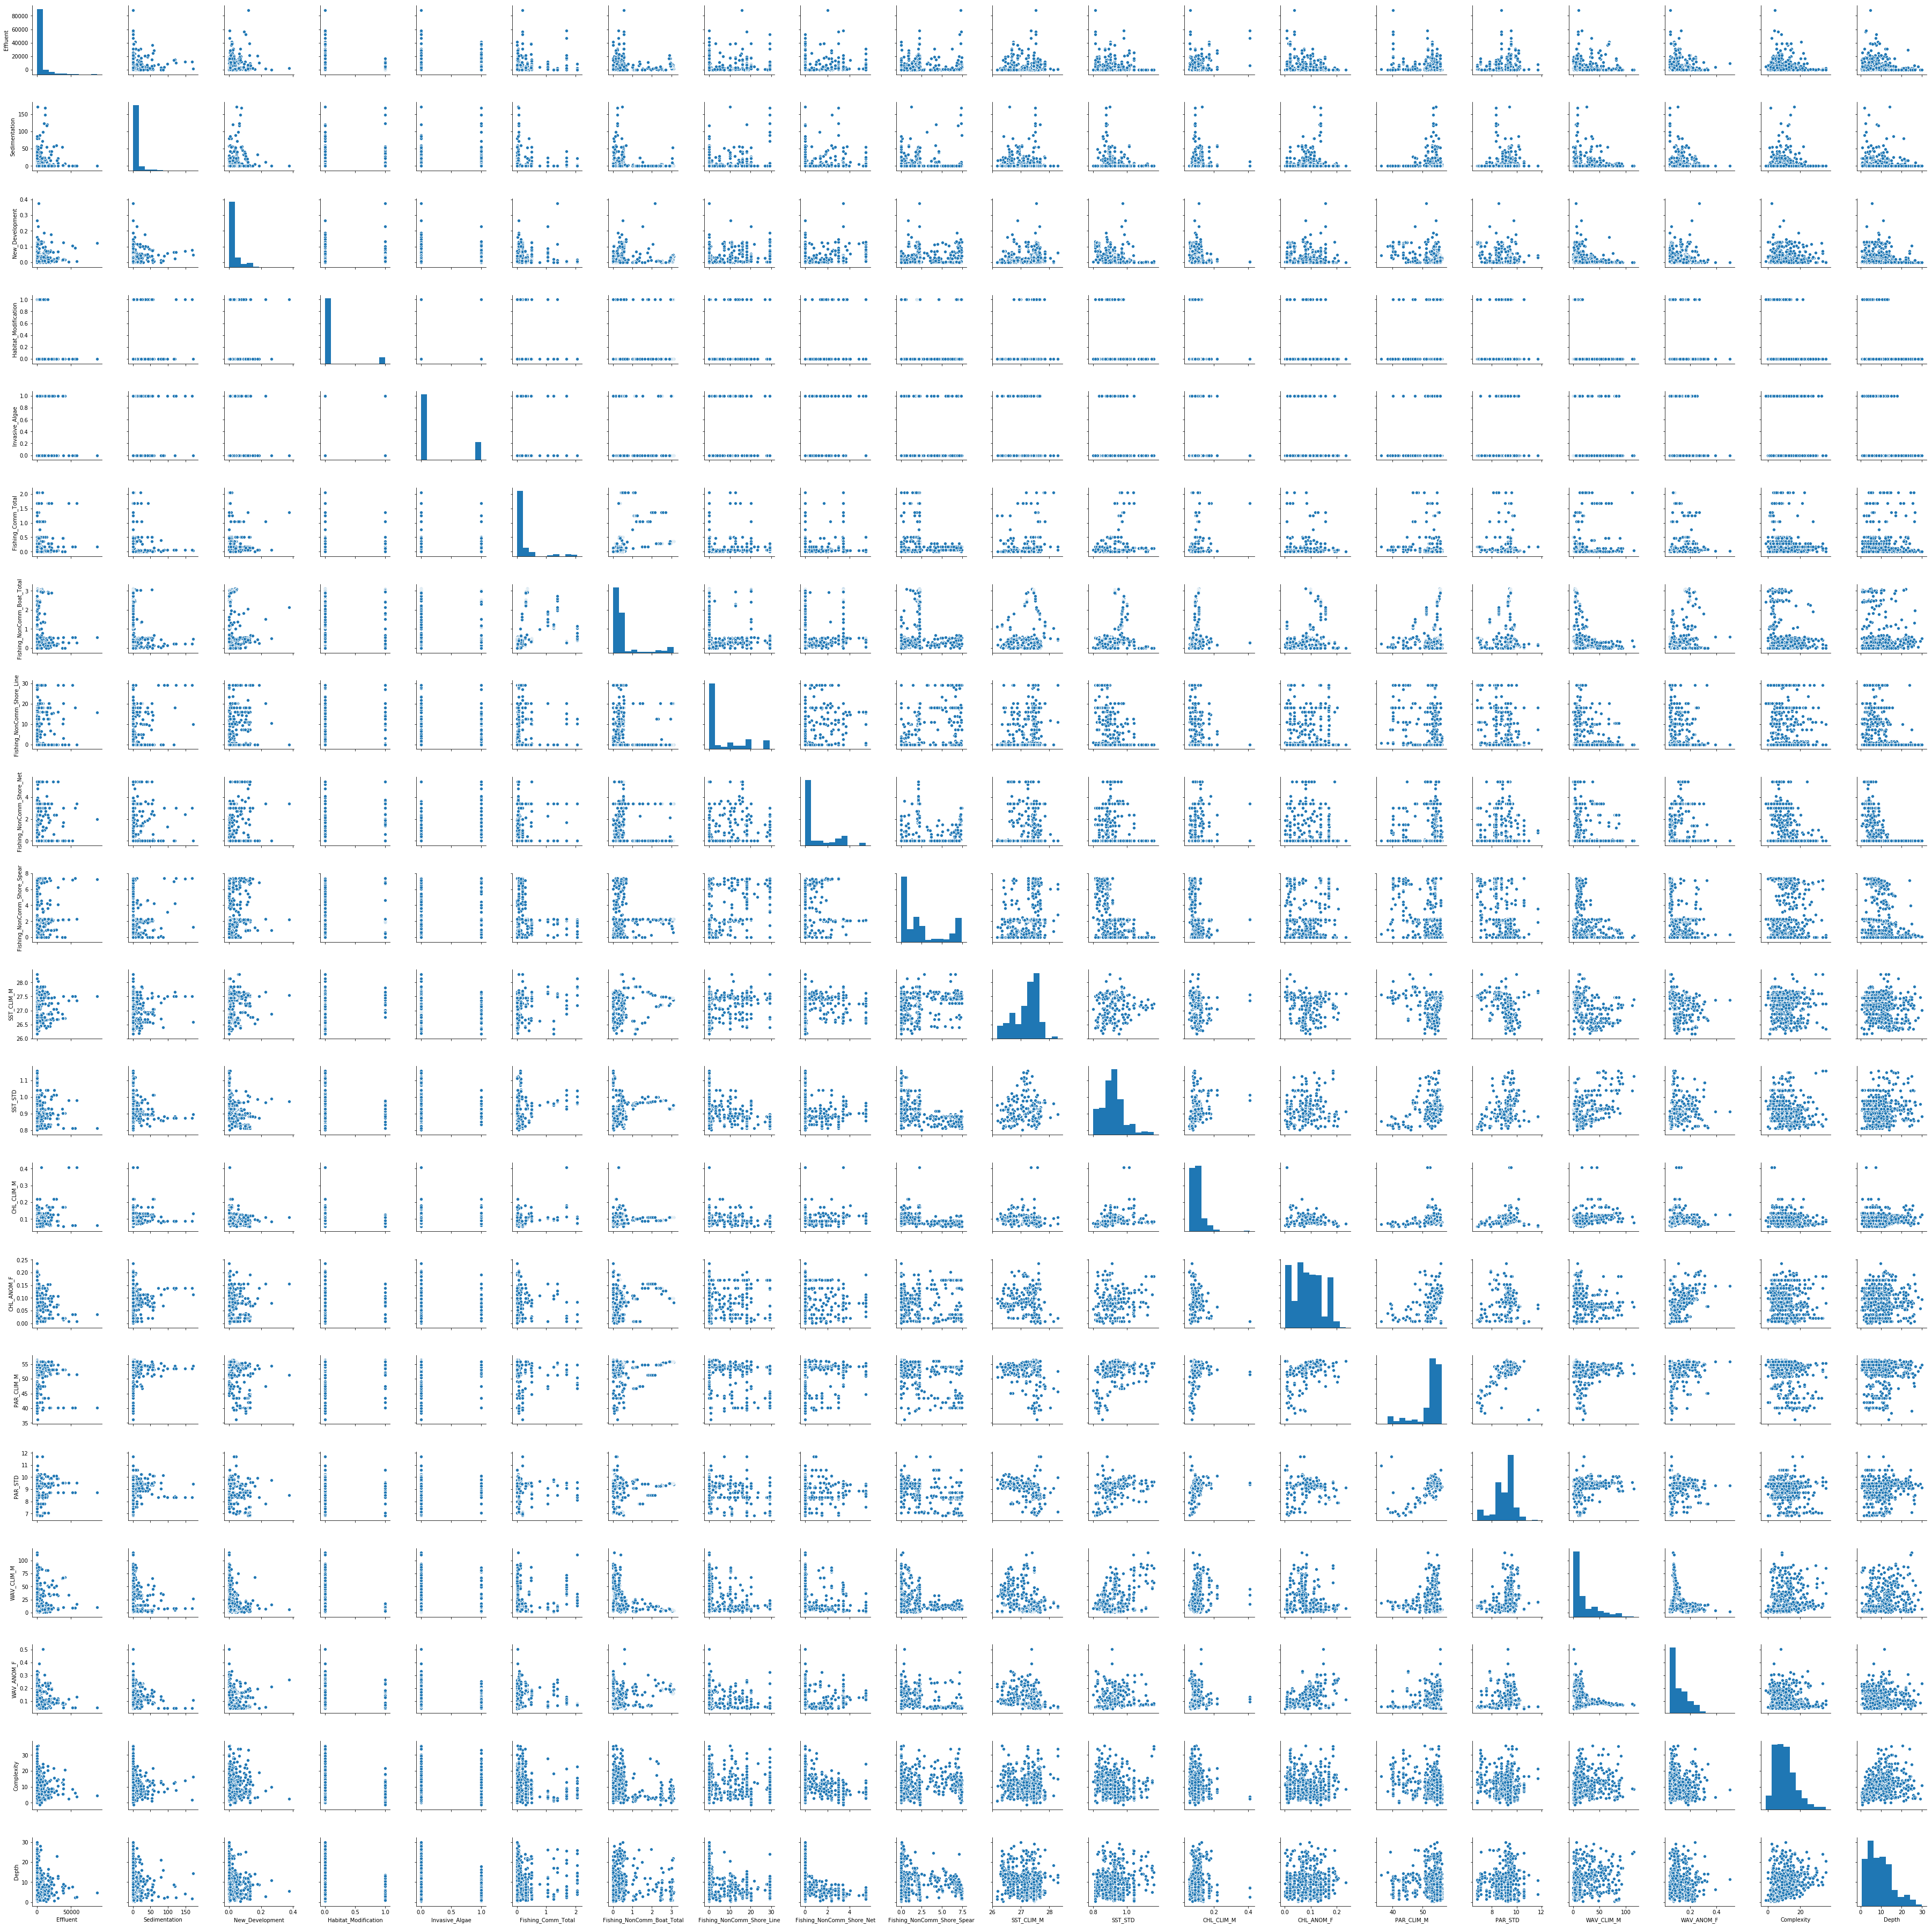

In [17]:
sns.pairplot(df.iloc[:, 14:34].dropna())

In [19]:
def plot_corr(df, size=9):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)


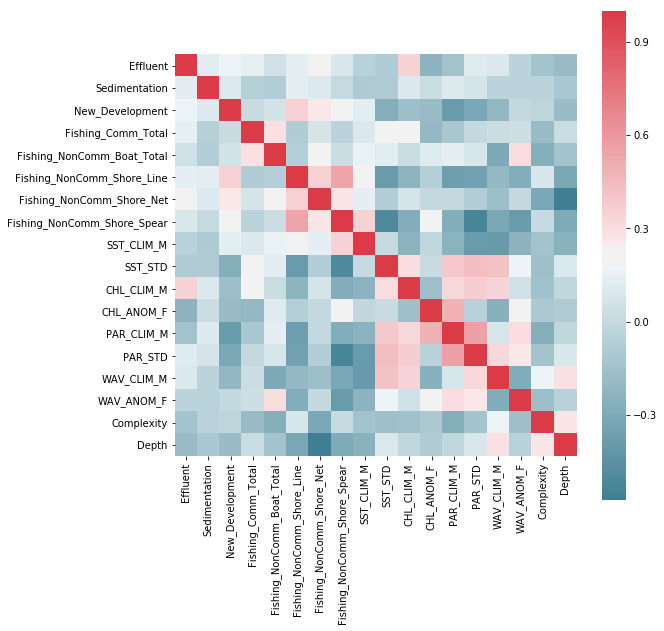

In [20]:
plot_corr(df.iloc[:,14:34])

In [21]:
corr = df.iloc[:,14:34].corr()
corr.style.background_gradient(cmap='coolwarm')

,Effluent,Sedimentation,New_Development,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
Effluent,1,0.123824,0.1763,0.146834,0.0482753,0.142841,0.188844,0.0869636,-0.0500867,-0.085605,0.353968,-0.234753,-0.141012,0.120926,0.0997777,-0.0350542,-0.130625,-0.188985
Sedimentation,0.123824,1,0.106301,-0.0620359,-0.0718031,0.13528,0.104147,0.00423883,-0.0898196,-0.0866881,0.0981496,0.0284759,0.110675,0.0716965,-0.0341368,-0.0436234,-0.0434483,-0.10709
New_Development,0.1763,0.106301,1,0.0112916,0.0612866,0.361021,0.258296,0.224318,0.128019,-0.271311,-0.16096,-0.190933,-0.382195,-0.308501,-0.213856,-0.00244791,-0.0235588,-0.18134
Fishing_Comm_Total,0.146834,-0.0620359,0.0112916,1,0.283251,-0.075322,0.070761,-0.0341475,0.102461,0.226274,0.241092,-0.198958,-0.115221,-0.00248638,0.0234577,0.0392839,-0.191297,0.0199405
Fishing_NonComm_Boat_Total,0.0482753,-0.0718031,0.0612866,0.283251,1,-0.0637713,0.238035,0.0247162,0.162781,0.124855,0.0223223,0.117599,0.143229,0.08207,-0.300223,0.303167,-0.263961,-0.134031
Fishing_NonComm_Shore_Line,0.142841,0.13528,0.361021,-0.075322,-0.0637713,1,0.356692,0.548215,0.217731,-0.394035,-0.233958,-0.0664744,-0.365175,-0.346015,-0.198744,-0.272203,0.0801971,-0.31561
Fishing_NonComm_Shore_Net,0.188844,0.104147,0.258296,0.070761,0.238035,0.356692,1,0.267529,0.144256,-0.0724804,0.0698112,-0.00249775,-0.00643345,-0.069331,-0.171075,-0.00608794,-0.313814,-0.572345
Fishing_NonComm_Shore_Spear,0.0869636,0.00423883,0.224318,-0.0341475,0.0247162,0.548215,0.267529,1,0.351551,-0.502036,-0.271722,0.2239,-0.281076,-0.531954,-0.319118,-0.387646,0.00838463,-0.29314
SST_CLIM_M,-0.0500867,-0.0898196,0.128019,0.102461,0.162781,0.217731,0.144256,0.351551,1,0.0076375,-0.245727,-0.00832347,-0.241217,-0.392717,-0.399447,-0.235164,-0.138797,-0.251126
SST_STD,-0.085605,-0.0866881,-0.271311,0.226274,0.124855,-0.394035,-0.0724804,-0.502036,0.0076375,1,0.302525,0.0142381,0.389979,0.439069,0.422092,0.175756,-0.156346,0.09151


### Look at the distribution of test and train observations across islands

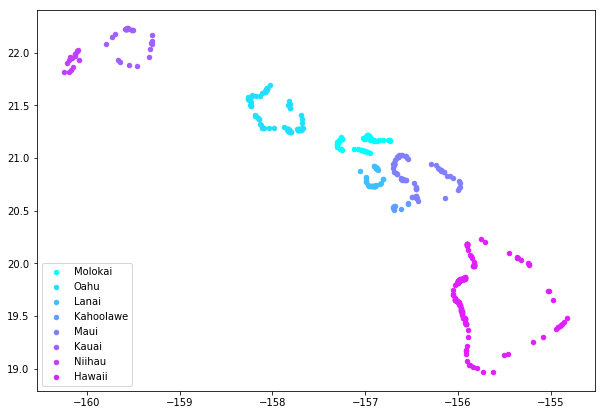

In [22]:
# Unique names of islands
uniq = list(set(train.Island))

# Set the color map to match the number of islands
z = range(1, len(uniq))
hot = plt.get_cmap('cool')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

x = train.Long
y = train.Lat

plt.figure(figsize=(10,7))
# Plot each island
for i in range(len(uniq)):
    indx = train['Island'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=20, color=scalarMap.to_rgba(i), label=uniq[i])

plt.legend(loc='lower left')
plt.show()

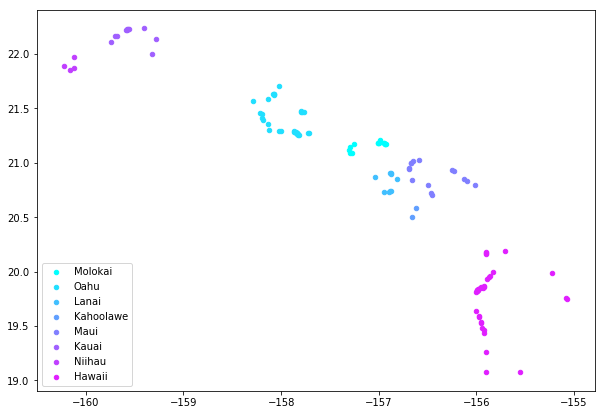

In [23]:
plt.figure(figsize=(10,7))
# Plot each island
for i in range(len(uniq)):
    indx = test['Island'] == uniq[i]
    plt.scatter(test.Long[indx], test.Lat[indx], s=20, color=scalarMap.to_rgba(i), label=uniq[i])

plt.legend(loc='lower left')
plt.show()

### Assess collinearity with Variable Inflation Factor

In [24]:
# isolate the predictor columns
# pred = df.iloc[:, 14:34]

# add constant in the matrix of explanatory variable (required by the function)
# pred_const = add_constant(pred.dropna())

In [25]:
# output the variable inflation factors
# pd.Series([variance_inflation_factor(pred_const.values, i) 
#                for i in range(pred_const.shape[1])], 
#               index=pred_const.columns) #.sort_values(ascending=False)

const                          9557.675985
Effluent                          1.533180
Sedimentation                     1.194479
New_Development                   1.475527
Habitat_Modification              1.291691
Invasive_Algae                    1.321413
Fishing_Comm_Total                1.411625
Fishing_NonComm_Boat_Total        1.555146
Fishing_NonComm_Shore_Line        1.912666
Fishing_NonComm_Shore_Net         1.833554
Fishing_NonComm_Shore_Spear       2.858704
SST_CLIM_M                        2.147285
SST_STD                           2.611084
CHL_CLIM_M                        1.827126
CHL_ANOM_F                        2.216701
PAR_CLIM_M                        3.297628
PAR_STD                           2.501900
WAV_CLIM_M                        2.819846
WAV_ANOM_F                        2.103854
Complexity                        1.405406
Depth                             1.886404
dtype: float64

This matches the VIF output in R when I re-run Jouffray's code.